# <a id='toc1_'></a>[Implémentez un modèle de scoring](#toc0_)
Projet 7 OpenClassRooms, à partir d'un kernel Kaggle

**Table of contents**<a id='toc0_'></a>    
- [Implémentez un modèle de scoring](#toc1_)    
  - [Imports](#toc1_1_)    
  - [Data Exploration](#toc1_2_)    
    - [Check Duplicate data](#toc1_2_1_)    
    - [Check Filling rates](#toc1_2_2_)    
    - [Numeric Features](#toc1_2_3_)    
      - [Visualisation](#toc1_2_3_1_)   
      - [Relationship](#toc1_2_3_2_)       
    - [Categorical Features](#toc1_2_4_)   
      - [Visualisation](#toc1_2_4_1_)   
      - [Relationship](#toc1_2_4_2_) 
  - [Preprocessing + feature engineering](#toc1_3_)
    - [Data Validation](#toc1_3_1_)
    - [Handling Missing Data](#toc1_3_2_)
    - [Encoding categorical data + remove missing categories](#toc1_3_3_)
    - [Saving Datasets](#toc1_3_4_)
    - [Same with smaller Dataset (TARGET corr > 0.04)](#toc1_3_5_)
    - [Saving Datasets short](#toc1_3_6_)

## <a id='toc1_1_'></a>[Imports](#toc0_)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns  
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from dython.nominal import associations

import mlflow

In [2]:
# import files "application_{train|test}.csv"
application_train = pd.read_csv('C:/Users/octav/Documents/Formation Data Scientist/Projet 7/home-credit-default-risk/application_train.csv')
application_test = pd.read_csv('C:/Users/octav/Documents/Formation Data Scientist/Projet 7/home-credit-default-risk/application_test.csv')

## <a id='toc1_2_'></a>[Data Exploration](#toc0_)

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_train.shape

(307511, 122)

In [6]:
application_test.shape

(48744, 121)

In [7]:
application_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
application_train.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### <a id='toc1_2_1_'></a>[Check Duplicate data](#toc0_)

In [9]:
# Check for duplicate data in the train dataset
application_train.duplicated().sum()

0

In [10]:
application_test.duplicated().sum()

0

In [11]:
# Check for duplicate data in the train dataset by id
application_train.duplicated(subset='SK_ID_CURR').sum()

0

In [12]:
application_test.duplicated(subset='SK_ID_CURR').sum()

0

### <a id='toc1_2_2_'></a>[Check Filling rates](#toc0_)

In [13]:
def info(df):
    na = df.isna().mean()
    missings = na[na != 0].sort_values(ascending=False)

    print(f'\n the shape of the dataframe is : \n', df.shape)
    print('-' * 80)
    print('\n data types :\n', df.dtypes.value_counts().sort_values())
    print('-' * 80)
    print('-' * 80)
    print('\n number of features having missing data : ', len(missings))
    print('-' * 80)
    print('\n missing data in the dataframe: \n', missings)
    print('-' * 80)
    print(missings[missings > 0.5])
    print('-' * 80)
    print('\n missing data over 50% : ',len(missings[missings > 0.5]))

info(application_train)


 the shape of the dataframe is : 
 (307511, 122)
--------------------------------------------------------------------------------

 data types :
 object     16
int64      41
float64    65
dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  67
--------------------------------------------------------------------------------

 missing data in the dataframe: 
 COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64
---------------------------------------

In [14]:
info(application_test)


 the shape of the dataframe is : 
 (48744, 121)
--------------------------------------------------------------------------------

 data types :
 object     16
int64      40
float64    65
dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  64
--------------------------------------------------------------------------------

 missing data in the dataframe: 
 COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
COMMONAREA_AVG              0.687161
NONLIVINGAPARTMENTS_MEDI    0.684125
NONLIVINGAPARTMENTS_AVG     0.684125
                              ...   
OBS_60_CNT_SOCIAL_CIRCLE    0.000595
DEF_30_CNT_SOCIAL_CIRCLE    0.000595
OBS_30_CNT_SOCIAL_CIRCLE    0.000595
AMT_ANNUITY                 0.000492
EXT_SOURCE_2                0.000164
Length: 64, dtype: float64
----------------------------------------

<Axes: xlabel='TARGET', ylabel='count'>

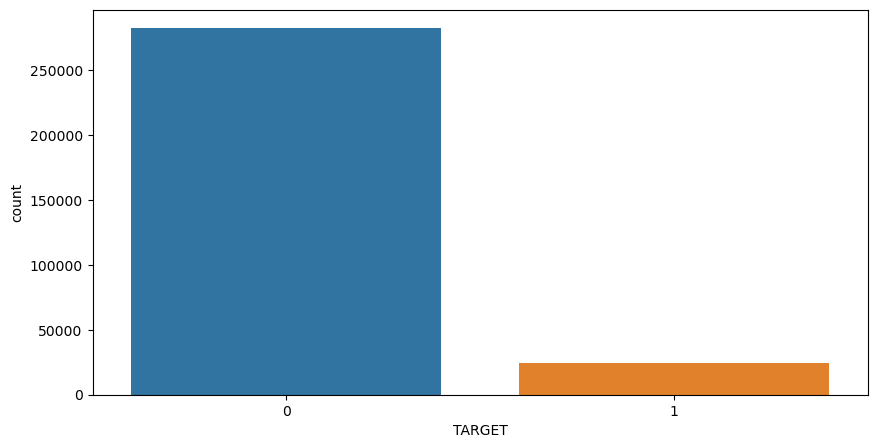

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))  
sns.countplot(x=application_train.TARGET)

([<matplotlib.patches.Wedge at 0x22ab50c2b50>,
 [Text(-1.0648123216659293, 0.27599768047650985, '0'),
  Text(1.0648123152057372, -0.27599770540024077, '1')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.93%'),
  Text(0.5808067173849475, -0.15054420294558588, '8.07%')])

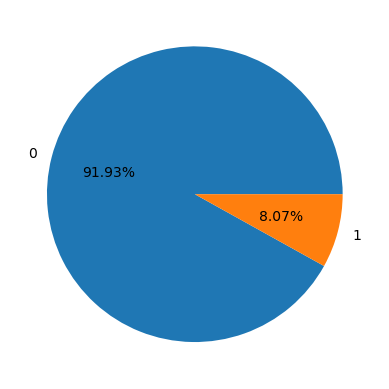

In [18]:
temp = application_train.TARGET.value_counts()
plt.pie(temp, labels = temp.index, autopct='%1.2f%%')

### <a id='toc1_2_3_'></a>[Numeric Features](#toc0_)

In [19]:
NUMERIC_FEATURES = application_train.select_dtypes(['int8',
                                                    'int16',
                                                    'float16',
                                                    'int32',
                                                    'float32',
                                                    'int64',
                                                    'float64']).columns

In [20]:
application_train[NUMERIC_FEATURES].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


From this dataframe numeric features are not well identified and contains categorical features representent as numerical ones and these are : <br>
- **SK_ID_CURR** is an index not feature .
- **TARGET** ,**children** represents the number of children the applicant have. <br>
- **FLAG_DOCUMENT_2**, **FLAG_DOCUMENT_3**, .... **FLAG_DOCUMENT_20** ,**FLAG_DOCUMENT_21** :These features are binary flags indicating the presence or absence of specific documents in the applicant's file. Each flag represents a different type of document (e.g., identification documents, income documents, etc.)<br>

another finding is that the group :<br>
**AMT_REQ_CREDIT_BUREAU_HOUR**,**AMT_REQ_CREDIT_BUREAU_DAY**,**AMT_REQ_CREDIT_BUREAU_WEEK**,**AMT_REQ_CREDIT_BUREAU_MON**, **AMT_REQ_CREDIT_BUREAU_QRT**,**AMT_REQ_CREDIT_BUREAU_YEAR** represent the number of inquiries or requests made to the Credit Bureau by the applicant within specific time intervals. Each feature corresponds to a different time unit (hour, day, week, month, quarter, year).

#### <a id='toc1_2_3_1_'></a>[Visualisation](#toc0_)

In [21]:
def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(4, 2, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'TARGET':
            i += 1
            plt.subplot(4, 2, i)
            sns.kdeplot(t1[feature], bw_method=0.5, color='red', label="TARGET = 1")
            sns.kdeplot(t0[feature], bw_method=0.5, label="default = 0")
            plt.ylabel('Density plot', fontsize=12)
            plt.xlabel(feature, fontsize=12)
            plt.xticks(fontsize=12, rotation=90)  # Set the font size for x-axis labels
            plt.yticks(fontsize=12)  # Set the font size for y-axis labels

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

In [22]:
domain_features=['AMT_CREDIT',
                 'AMT_ANNUITY',
                 'DAYS_BIRTH',
                 'DAYS_EMPLOYED',
                 'AMT_INCOME_TOTAL',
                 'AMT_GOODS_PRICE',
                 'REGION_POPULATION_RELATIVE']

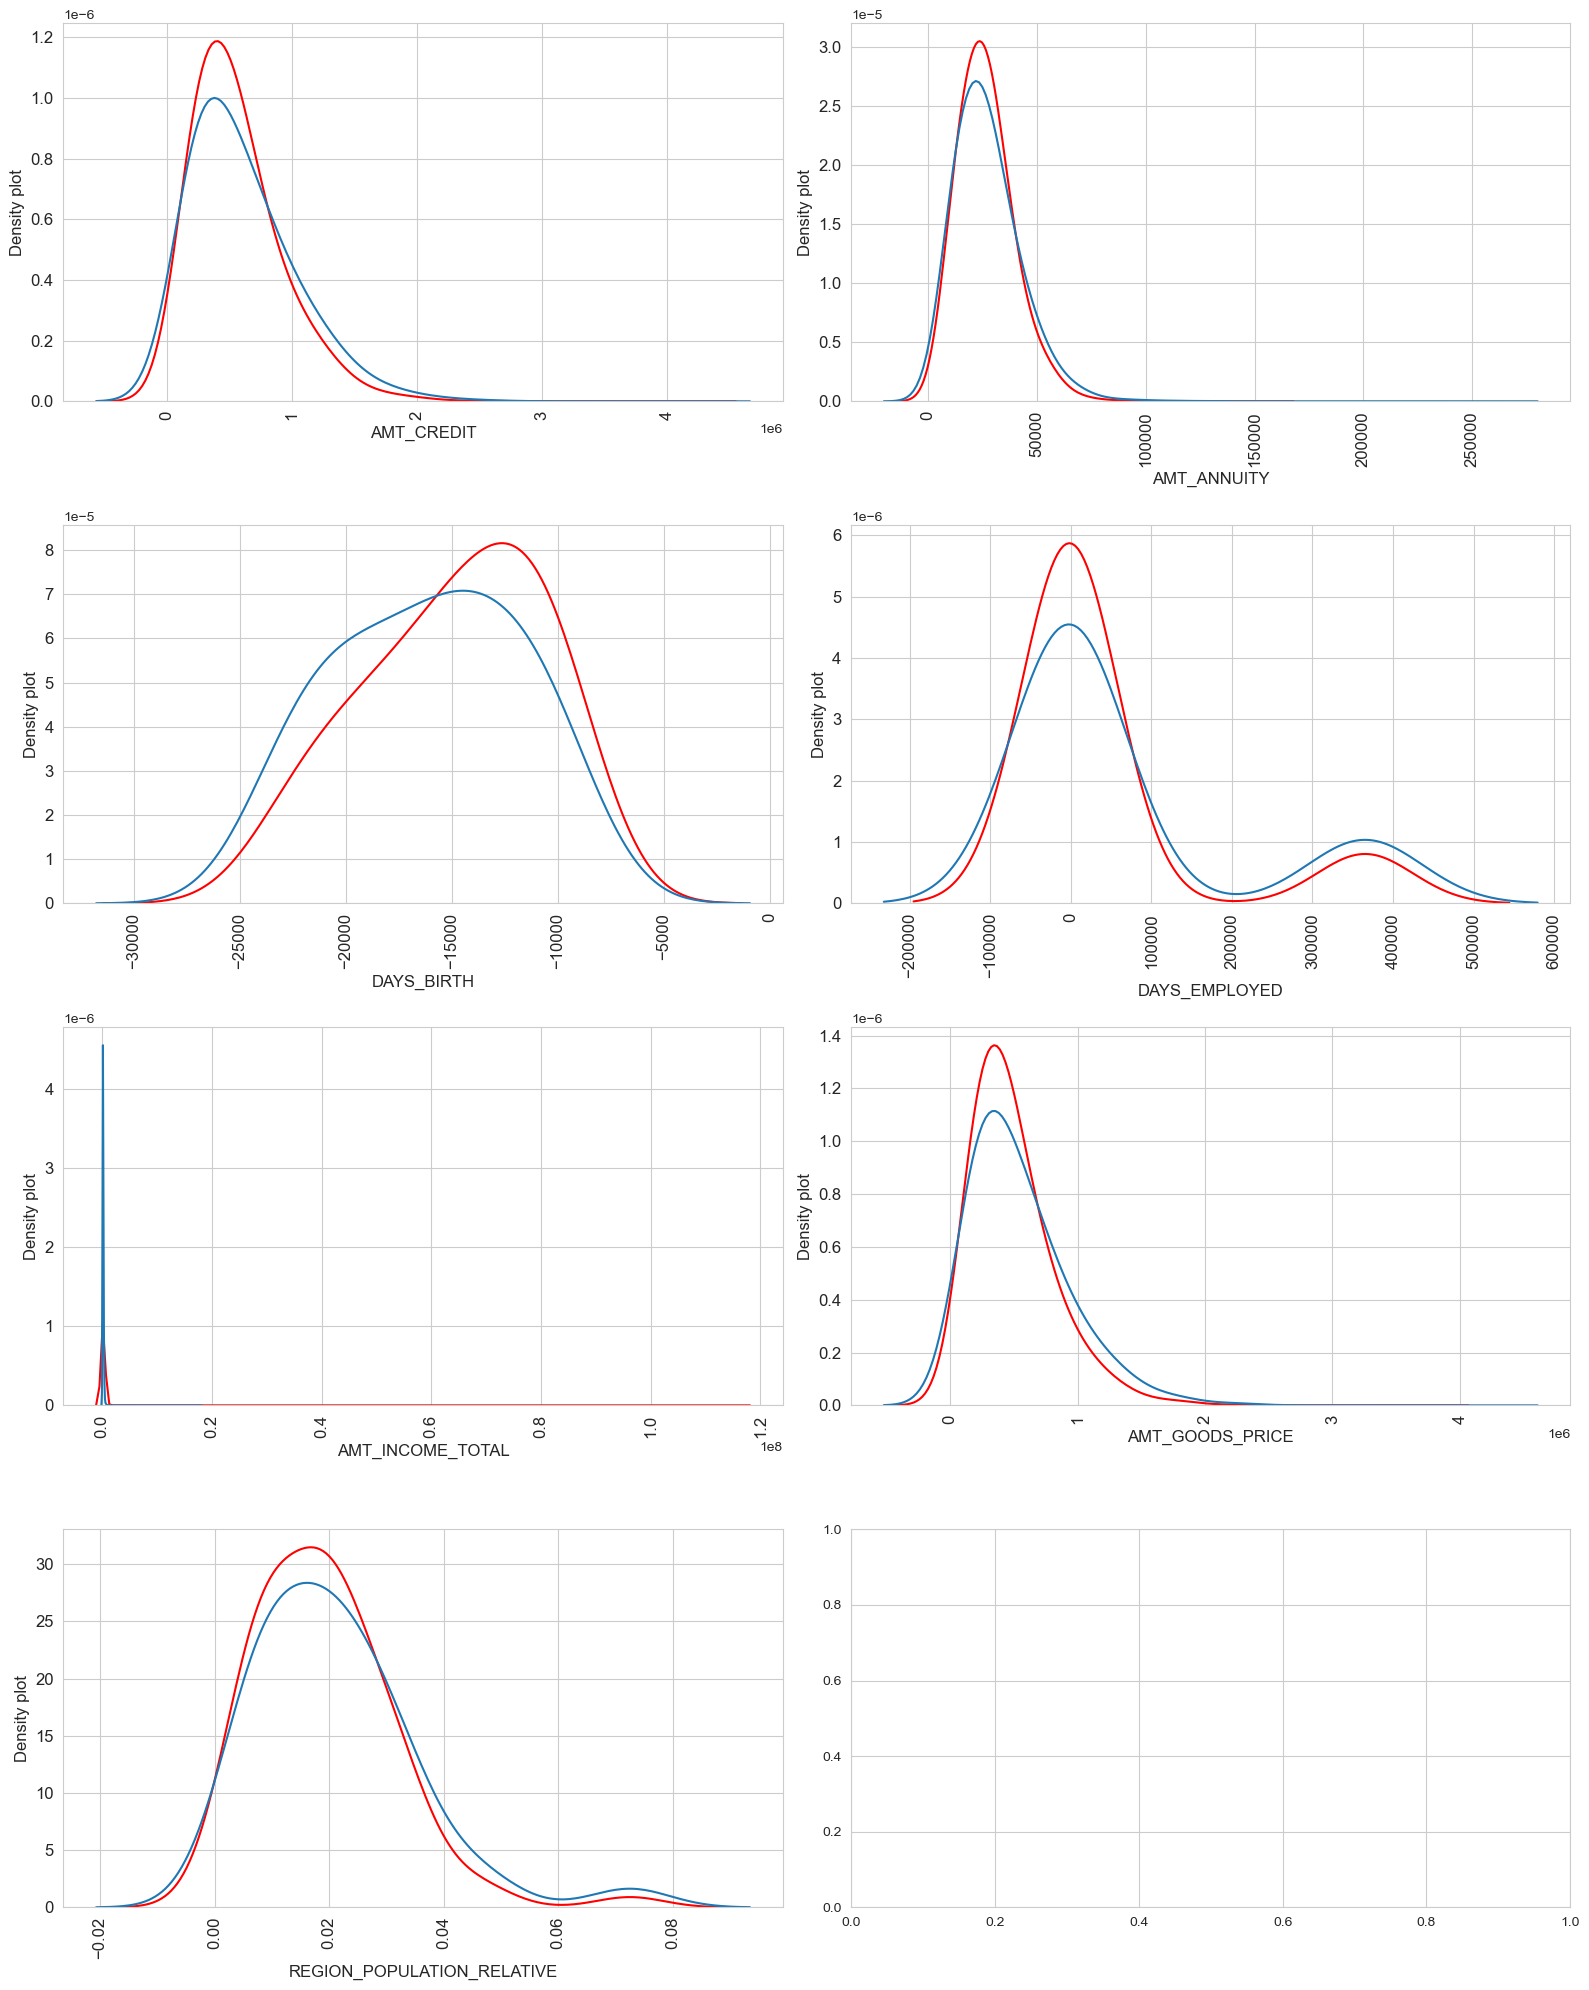

In [23]:
plot_distribution(application_train,domain_features)

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

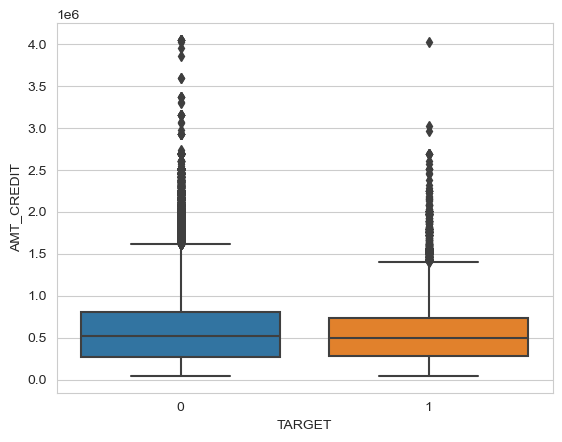

In [24]:
sns.boxplot(application_train, x='TARGET', y='AMT_CREDIT')

#### <a id='toc1_2_3_2_'></a>[Relationship](#toc0_)

In [25]:
EXT_SOURCE_TARGET=['EXT_SOURCE_1',
                   'EXT_SOURCE_2',
                   'EXT_SOURCE_3',
                   'TARGET']

application_train[EXT_SOURCE_TARGET].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.0,0.214,0.1868,-0.1553
EXT_SOURCE_2,0.214,1.0,0.1092,-0.1605
EXT_SOURCE_3,0.1868,0.1092,1.0,-0.1789
TARGET,-0.1553,-0.1605,-0.1789,1.0


EXT_SOURCE features have small correlation between each other and they have small negative correlatons with the target .

In [26]:
def t_test(df, p_limit=0.05):
    t_stat_list=[]
    p_val_list=[]
    variable=[]

    for var in df.columns:    
        t_stat, p_val = stats.ttest_ind(application_train[application_train['TARGET'] == 0][var],
                                        application_train[application_train['TARGET'] == 1][var])
        if p_val < p_limit:
            variable.append(var)
            t_stat_list.append(t_stat)
            p_val_list.append(p_val)

    t_test = pd.DataFrame({'variable': variable, 't_stat': t_stat_list, 'p_val': p_val_list})
    return t_test.sort_values(by='p_val', ascending=True)

In [27]:
t_test(application_train.select_dtypes(['int8','int16','float16','int32','float32','int64','float64']))

C:\Users\octav\AppData\Local\Temp\ipykernel_14680\1654801050.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(application_train[application_train['TARGET'] == 0][var],


,variable,t_stat,p_val
0,TARGET,-inf,0.000000e+00
5,DAYS_BIRTH,-43.519836,0.000000e+00
13,REGION_RATING_CLIENT_W_CITY,-33.829889,2.078455e-250
12,REGION_RATING_CLIENT,-32.718363,2.172433e-234
8,DAYS_ID_PUBLISH,-28.572653,2.527524e-179
18,REG_CITY_NOT_WORK_CITY,-28.315052,3.805463e-176
9,FLAG_EMP_PHONE,-25.525747,1.442660e-143
6,DAYS_EMPLOYED,24.941366,3.631173e-137
17,REG_CITY_NOT_LIVE_CITY,-24.643084,5.894986e-134
21,FLAG_DOCUMENT_3,-24.615815,1.153611e-133


These features have been identified as important based on the specific analysis performed( ttest), considering their potential relevance to the credit default prediction. However, it's essential to note that the importance of features can vary depending on the context, and modeling approach. Further investigation and modeling can help validate their significance and contribution to the predictive power of the models,so we will keep all the features for now.


### <a id='toc1_2_4_'></a>[Categorical Features](#toc0_)

In [28]:
application_train.select_dtypes('O').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

#### <a id='toc1_2_4_1_'></a>[Visualisation](#toc0_)

In [29]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        
        cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
        
        sns.set_color_codes("pastel")
        
        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()


In [30]:
important_features=['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE',
'ORGANIZATION_TYPE']


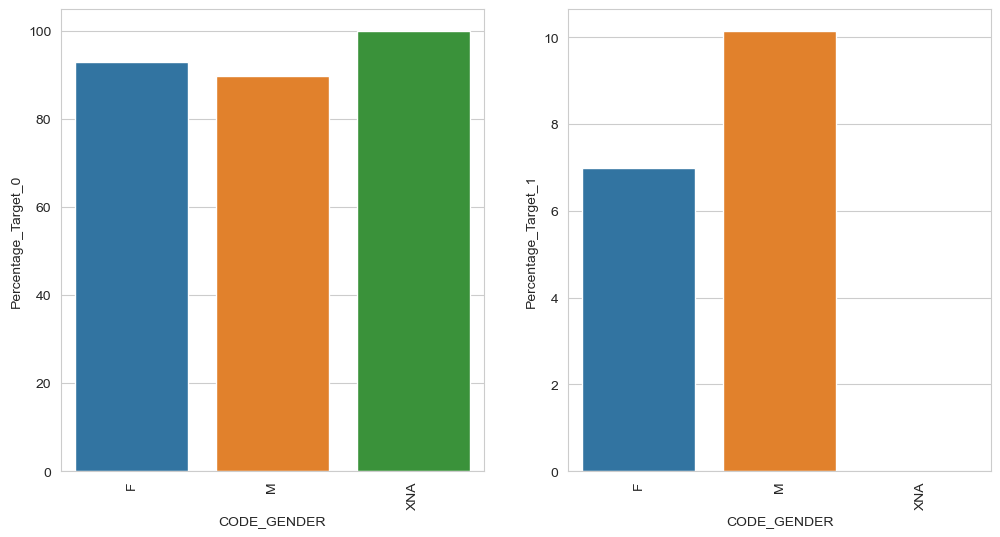

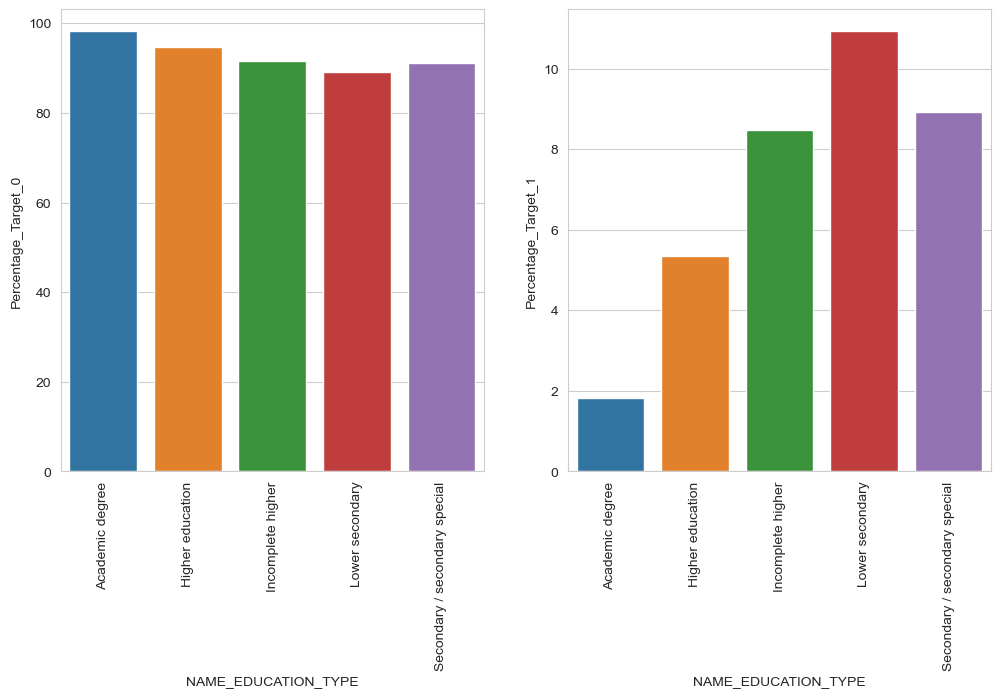

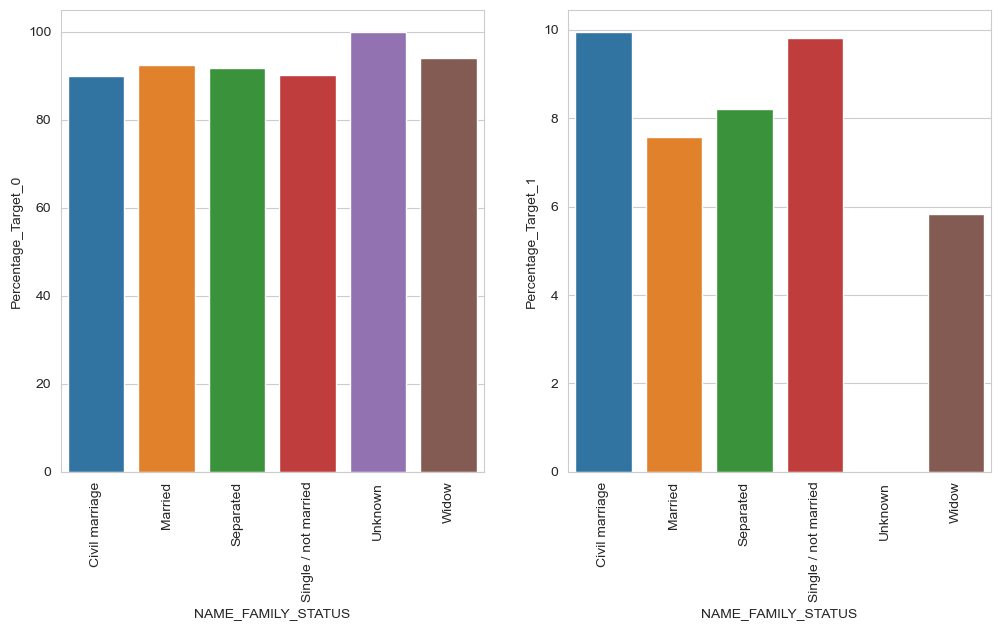

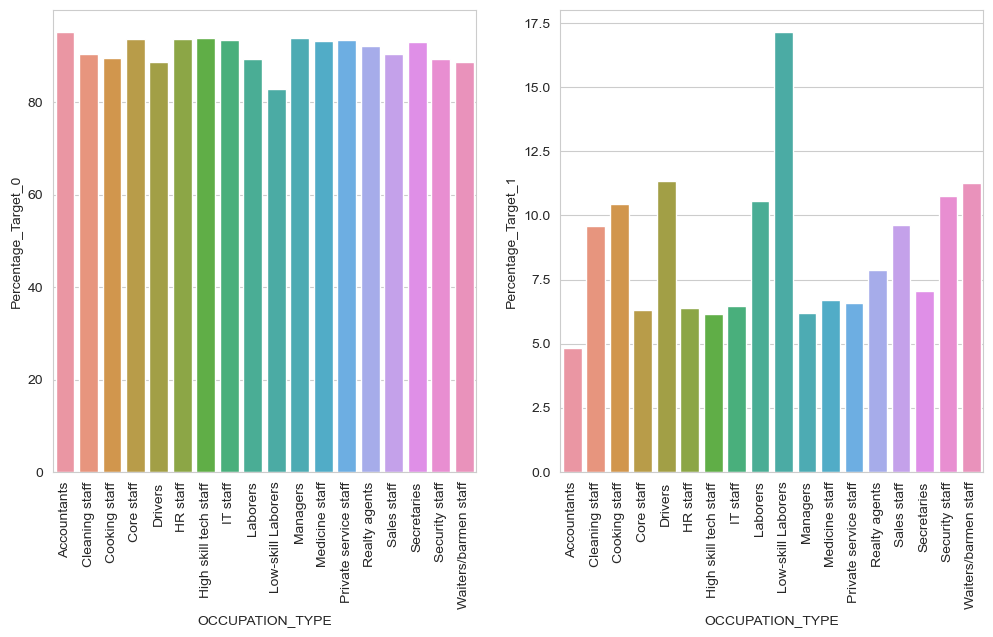

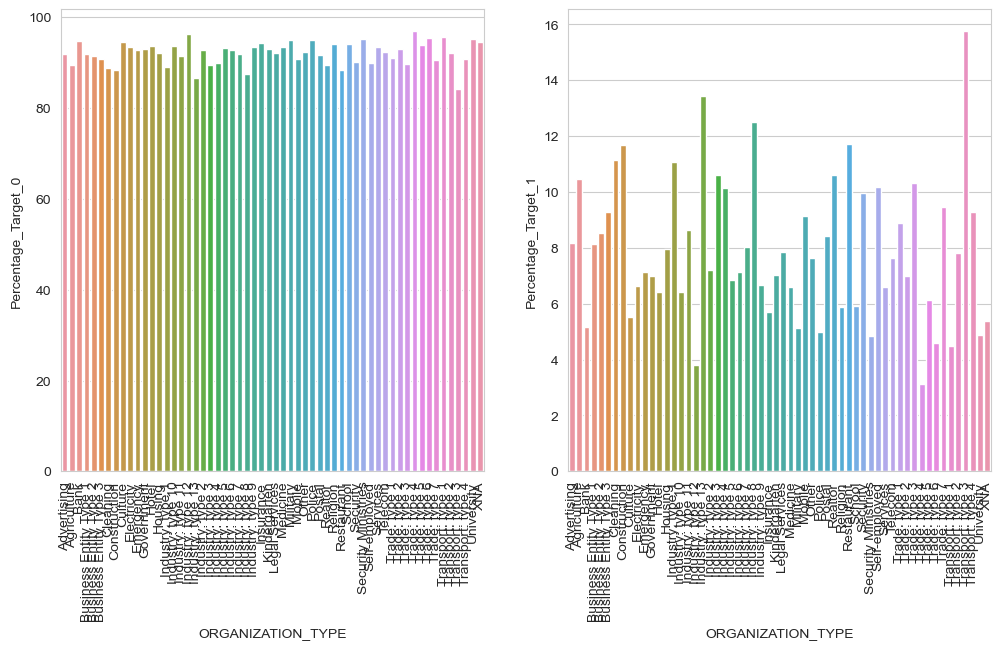

In [31]:
cat_stats(application_train,important_features)

#### <a id='toc1_2_4_2_'></a>[Relationship](#toc0_)

In [32]:
def chi2_test(df):
    chi2_stat_list=[]
    p_val_list=[]
    dof_list=[]
    ex_list=[]
    
    for var in df.columns:
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(application_train['TARGET'],
                                                                       application_train[var]))
        chi2_stat_list.append(chi2_stat)
        p_val_list.append(p_val)
        dof_list.append(dof)
        ex_list.append(ex)
        
    chi_squared = pd.DataFrame({'variable':df.columns,
                                'dof':dof_list,
                                'chi2_stat':chi2_stat_list,
                                'p_val':p_val_list})
    chi_squared.set_index('variable', inplace=True)
    print(chi_squared.sort_values(by='p_val', ascending=True))

In [33]:
chi2_test(application_train.select_dtypes('O'))

                            dof    chi2_stat          p_val
variable                                                   
ORGANIZATION_TYPE            57  1609.240636  5.224541e-299
OCCUPATION_TYPE              17  1402.846796  3.784500e-288
NAME_INCOME_TYPE              7  1253.470808  1.928146e-266
NAME_EDUCATION_TYPE           4  1019.213187  2.447681e-219
CODE_GENDER                   2   920.791334  1.129022e-200
NAME_FAMILY_STATUS            5   504.694083  7.744842e-107
NAME_HOUSING_TYPE             5   420.556190   1.099089e-88
NAME_CONTRACT_TYPE            1   293.150542   1.023515e-65
FLAG_OWN_CAR                  1   146.656018   9.330994e-34
WALLSMATERIAL_MODE            6   139.235314   1.453180e-27
HOUSETYPE_MODE                2    27.632556   9.992328e-07
EMERGENCYSTATE_MODE           1    23.678150   1.138680e-06
NAME_TYPE_SUITE               6    32.825315   1.132931e-05
FLAG_OWN_REALTY               1    11.575827   6.681470e-04
FONDKAPREMONT_MODE            3    16.80

## <a id='toc1_3_'></a>[Preprocessing + feature engineering](#toc0_)

### <a id='toc1_3_1_'></a>[Data Validation](#toc0_)

Remove the index column and replace some features to categorical ones.

Dropping 'SK_ID_CURR', replacing anomalous values (365243) in 'DAYS_EMPLOYED' with NaN, and replacing 'XNA' in 'CODE_GENDER' with NaN

In [34]:
application_train.drop('SK_ID_CURR', inplace=True, axis=1)
SK_ID_CURR = application_test['SK_ID_CURR']
application_test.drop('SK_ID_CURR', inplace=True, axis=1)

application_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
application_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

application_train['CODE_GENDER'].replace('XNA', np.nan, inplace=True)
application_test['CODE_GENDER'].replace('XNA', np.nan, inplace=True)

Aggregating the 20 flag document features into a single feature by summing the number of flag documents per applicant can be a useful approach. By creating a new aggregated feature, we can capture the overall count or presence of flag documents for each applicant and reduce sparsity of the data, which may provide valuable information for the analysis or modeling task.

In [35]:
FLAG_DOCUMENTS = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                  'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_train['FLAG_DOCUMENT'] = application_train[FLAG_DOCUMENTS].sum(axis=1)
application_test['FLAG_DOCUMENT'] = application_test[FLAG_DOCUMENTS].sum(axis=1)

application_train.drop(FLAG_DOCUMENTS, axis=1, inplace=True)
application_test.drop(FLAG_DOCUMENTS, axis=1, inplace=True)


we should drop the **AMT_REQ_CREDIT** features because of they have no impact to the target and this may cause model missleading.

In [36]:
AMT_REQ_CREDIT = ['AMT_REQ_CREDIT_BUREAU_HOUR',
                  'AMT_REQ_CREDIT_BUREAU_DAY',
                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_QRT']

application_train.drop(AMT_REQ_CREDIT, axis=1, inplace=True)
application_test.drop(AMT_REQ_CREDIT, axis=1, inplace=True)

Add some new features

In [37]:
# MEAN_EXT_SOURCE
application_train['MEAN_EXT_SOURCE'] = application_train[['EXT_SOURCE_1',
                                                          'EXT_SOURCE_2',
                                                          'EXT_SOURCE_3']].mean(axis=1)
application_test['MEAN_EXT_SOURCE'] = application_test[['EXT_SOURCE_1',
                                                        'EXT_SOURCE_2',
                                                        'EXT_SOURCE_3']].mean(axis=1)

# Generate DEBT_TO_INCOME_RATIO 
application_train['DEBT_TO_INCOME_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_test['DEBT_TO_INCOME_RATIO'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']

# Generate INCOME_TO_CREDIT 
application_train['INCOME_TO_CREDIT'] = application_train['AMT_INCOME_TOTAL'] / application_train['AMT_CREDIT']
application_test['INCOME_TO_CREDIT'] = application_test['AMT_INCOME_TOTAL'] / application_test['AMT_CREDIT']

In [38]:
new_numeric_features = ['MEAN_EXT_SOURCE',
                        'DEBT_TO_INCOME_RATIO',
                        'INCOME_TO_CREDIT']

In [39]:
t_test(application_train[new_numeric_features])

,variable,t_stat,p_val
0,DEBT_TO_INCOME_RATIO,4.284907,0.000018


 additional feature engineering was performed on both datasets. The following features were created based on patterns and analysis from EDA phase :

- **_INCOME_CLASS**: This feature categorizes the AMT_INCOME_TOTAL into three income classes: 'Low_INCOME', 'Medium_INCOME', and 'High_INCOME'.

- **ANNUITY_CLASS**: This feature divides the AMT_ANNUITY into three annuity classes: 'Low_ANNUITY', 'Medium_ANNUITY', and 'High_ANNUITY'.

- **AMT_GOODS_PRICE_0.2_0.7**: This binary feature indicates whether the AMT_GOODS_PRICE falls within the range of 20000 and 70000.

- **DAYS_BIRTH_CLASS**: This binary feature flags applicants with a DAYS_BIRTH value less than -15000, indicating older individuals.

- **CREDIT_UNDER_100K**: This binary feature identifies applicants with an AMT_CREDIT value below 100,000.


In [40]:
application_train['_INCOME_CLASS'] = pd.qcut(application_train['AMT_INCOME_TOTAL'],
                                             3,
                                             labels=['Low_INCOME',
                                                     'Medium_INCOME',
                                                     'High_INCOME'])
application_train['ANNUITY_CLASS'] = pd.qcut(application_train['AMT_ANNUITY'],
                                             3,
                                             labels=['Low_ANNUITY',
                                                     'Medium_ANNUITY',
                                                     'High_ANNUITY'])
application_train['AMT_GOODS_PRICE_0.2_0.7'] = np.where((application_train['AMT_GOODS_PRICE'] <= 70000) 
                                                        & (application_train['AMT_GOODS_PRICE'] >= 20000), 1, 0)
application_train['DAYS_BIRTH_CLASS'] = np.where(application_train['DAYS_BIRTH'] < -15000, 1, 0)
application_train['CREDIT_UNDER_100K'] = np.where(application_train['AMT_CREDIT'] < 100000, 1, 0)


application_test['_INCOME_CLASS'] = pd.qcut(application_test['AMT_INCOME_TOTAL'],
                                            3,
                                            labels=['Low_INCOME',
                                                    'Medium_INCOME',
                                                    'High_INCOME'])
application_test['ANNUITY_CLASS'] = pd.qcut(application_test['AMT_ANNUITY'],
                                            3,
                                            labels=['Low_ANNUITY',
                                                    'Medium_ANNUITY',
                                                    'High_ANNUITY'])
application_test['AMT_GOODS_PRICE_0.2_0.7'] = np.where((application_test['AMT_GOODS_PRICE'] <= 7000) 
                                                       & (application_test['AMT_GOODS_PRICE'] >= 2000), 1, 0)
application_test['DAYS_BIRTH_CLASS'] = np.where(application_test['DAYS_BIRTH'] < -15000, 1, 0)
application_test['CREDIT_UNDER_100K'] = np.where(application_test['AMT_CREDIT'] < 100000, 1, 0)

In [41]:
new_categorical_features = ['_INCOME_CLASS',
                            'ANNUITY_CLASS',
                            'AMT_GOODS_PRICE_0.2_0.7',
                            'DAYS_BIRTH_CLASS',
                            'CREDIT_UNDER_100K']

Let's test the statistical significance of the relationship between the new categorical features and the target variable, providing insights into their potential importance in predicting the target variable of interest

In [42]:
chi2_test(application_train[new_categorical_features])

                         dof    chi2_stat          p_val
variable                                                
DAYS_BIRTH_CLASS           1  1344.950176  1.927723e-294
ANNUITY_CLASS              2   157.760399   5.530502e-35
_INCOME_CLASS              2   152.501899   7.667140e-34
CREDIT_UNDER_100K          1    53.721017   2.310781e-13
AMT_GOODS_PRICE_0.2_0.7    1    34.102392   5.228696e-09


Based on the chi-squared test conducted on the new categorical features, the results indicate that several of these features exhibit a significant association with the target variable. The **DAYS_BIRTH_CLASS**, **ANNUITY_CLASS**, **_INCOME_CLASS**,**AMT_GOODS_PRICE_0.2_0.7**  and **CREDIT_UNDER_100K** features show statistically significant relationships with the target variable, as evidenced by their low p-values. This suggests that these features may be informative in predicting the target variable and can potentially be valuable in the modeling process. 

### <a id='toc1_3_2_'></a>[Handling Missing Data](#toc0_)

from the EDA **missing Data** represented in 67 columns and with different proportions from **0%** to **70%** ,and affects both numeric and categorical features.<br>
To tackle this problem our stragegy consists in :
- for numerical features we will remove features with highly missing proportion (more than 50%) and impute the rest using a robust strategy to outliers (median) .<br>
- for categorical features we will handle them in the encoding step by removing the dummy **NA** variable.

In [43]:
# Detect highly missing numeric features 
application_train_numeric = application_train.select_dtypes(include=['number'])
missings = application_train_numeric.loc[:, application_train_numeric.isna().mean() >= 0.6]
highly_missing_features = missings.columns

missings.columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI'],
      dtype='object')

In [44]:
# Remove highly missing features
application_train.drop(highly_missing_features, axis=1, inplace=True)
application_test.drop(highly_missing_features, axis=1, inplace=True)

In [45]:
target = application_train['TARGET']
features_train = application_train.drop('TARGET', axis=1)

# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='median')

numeric_features_train = features_train.select_dtypes(include='number')
imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)

numeric_features_test = application_test.select_dtypes(include='number')
imputed_numeric_features_test = numeric_imputer.transform(numeric_features_test)

In [46]:
application_train.shape

(307511, 89)

In [47]:
application_test.shape

(48744, 88)

### <a id='toc1_3_3_'></a>[Encoding categorical data + remove missing categories](#toc0_)

We perform preprocessing on categorical features in the training and test datasets by appling one-hot encoding without generating binary feature for **NAN** modalities and then concatenates the encoded features with the imputed numerical features. This results in processed features ready for training and evaluation of machine learning models.

In [245]:
# Impute categorical features using mode imputation and one-hot encoding
# using dummy_na=False ,we perform onehot encoding without affecting data distribution
categorical_features_train = features_train.select_dtypes(include='object')
dummy_categorical_features_train = pd.get_dummies(categorical_features_train, dummy_na=False)

categorical_features_test = application_test.select_dtypes(include='object')
dummy_categorical_features_test = pd.get_dummies(categorical_features_test, dummy_na=False)


# Concatenate imputed numerical and categorical features
imputed_features_train = pd.concat([target,
                                    pd.DataFrame(imputed_numeric_features_train,
                                                 columns=numeric_features_train.columns),
                                    dummy_categorical_features_train],
                                   axis=1)

imputed_features_test = pd.concat([pd.DataFrame(imputed_numeric_features_test,
                                                columns=numeric_features_test.columns),
                                   dummy_categorical_features_test],
                                  axis=1)

In [246]:
imputed_features_train.shape

(307511, 210)

In [247]:
imputed_features_test.shape

(48744, 207)

In [248]:
imputed_features_train.drop('NAME_INCOME_TYPE_Maternity leave',
                            axis=1,
                            inplace=True)
imputed_features_train.drop('NAME_FAMILY_STATUS_Unknown',
                            axis=1,
                            inplace=True)

In [249]:
imputed_features_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,...,0,0,0,0,0,0,1,0,1,0
307507,0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,-1648.0,-4388.0,...,0,0,0,0,0,0,1,0,1,0
307508,0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,-6737.0,...,0,0,0,0,0,1,0,0,1,0
307509,1,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,...,0,0,0,0,0,0,1,0,1,0


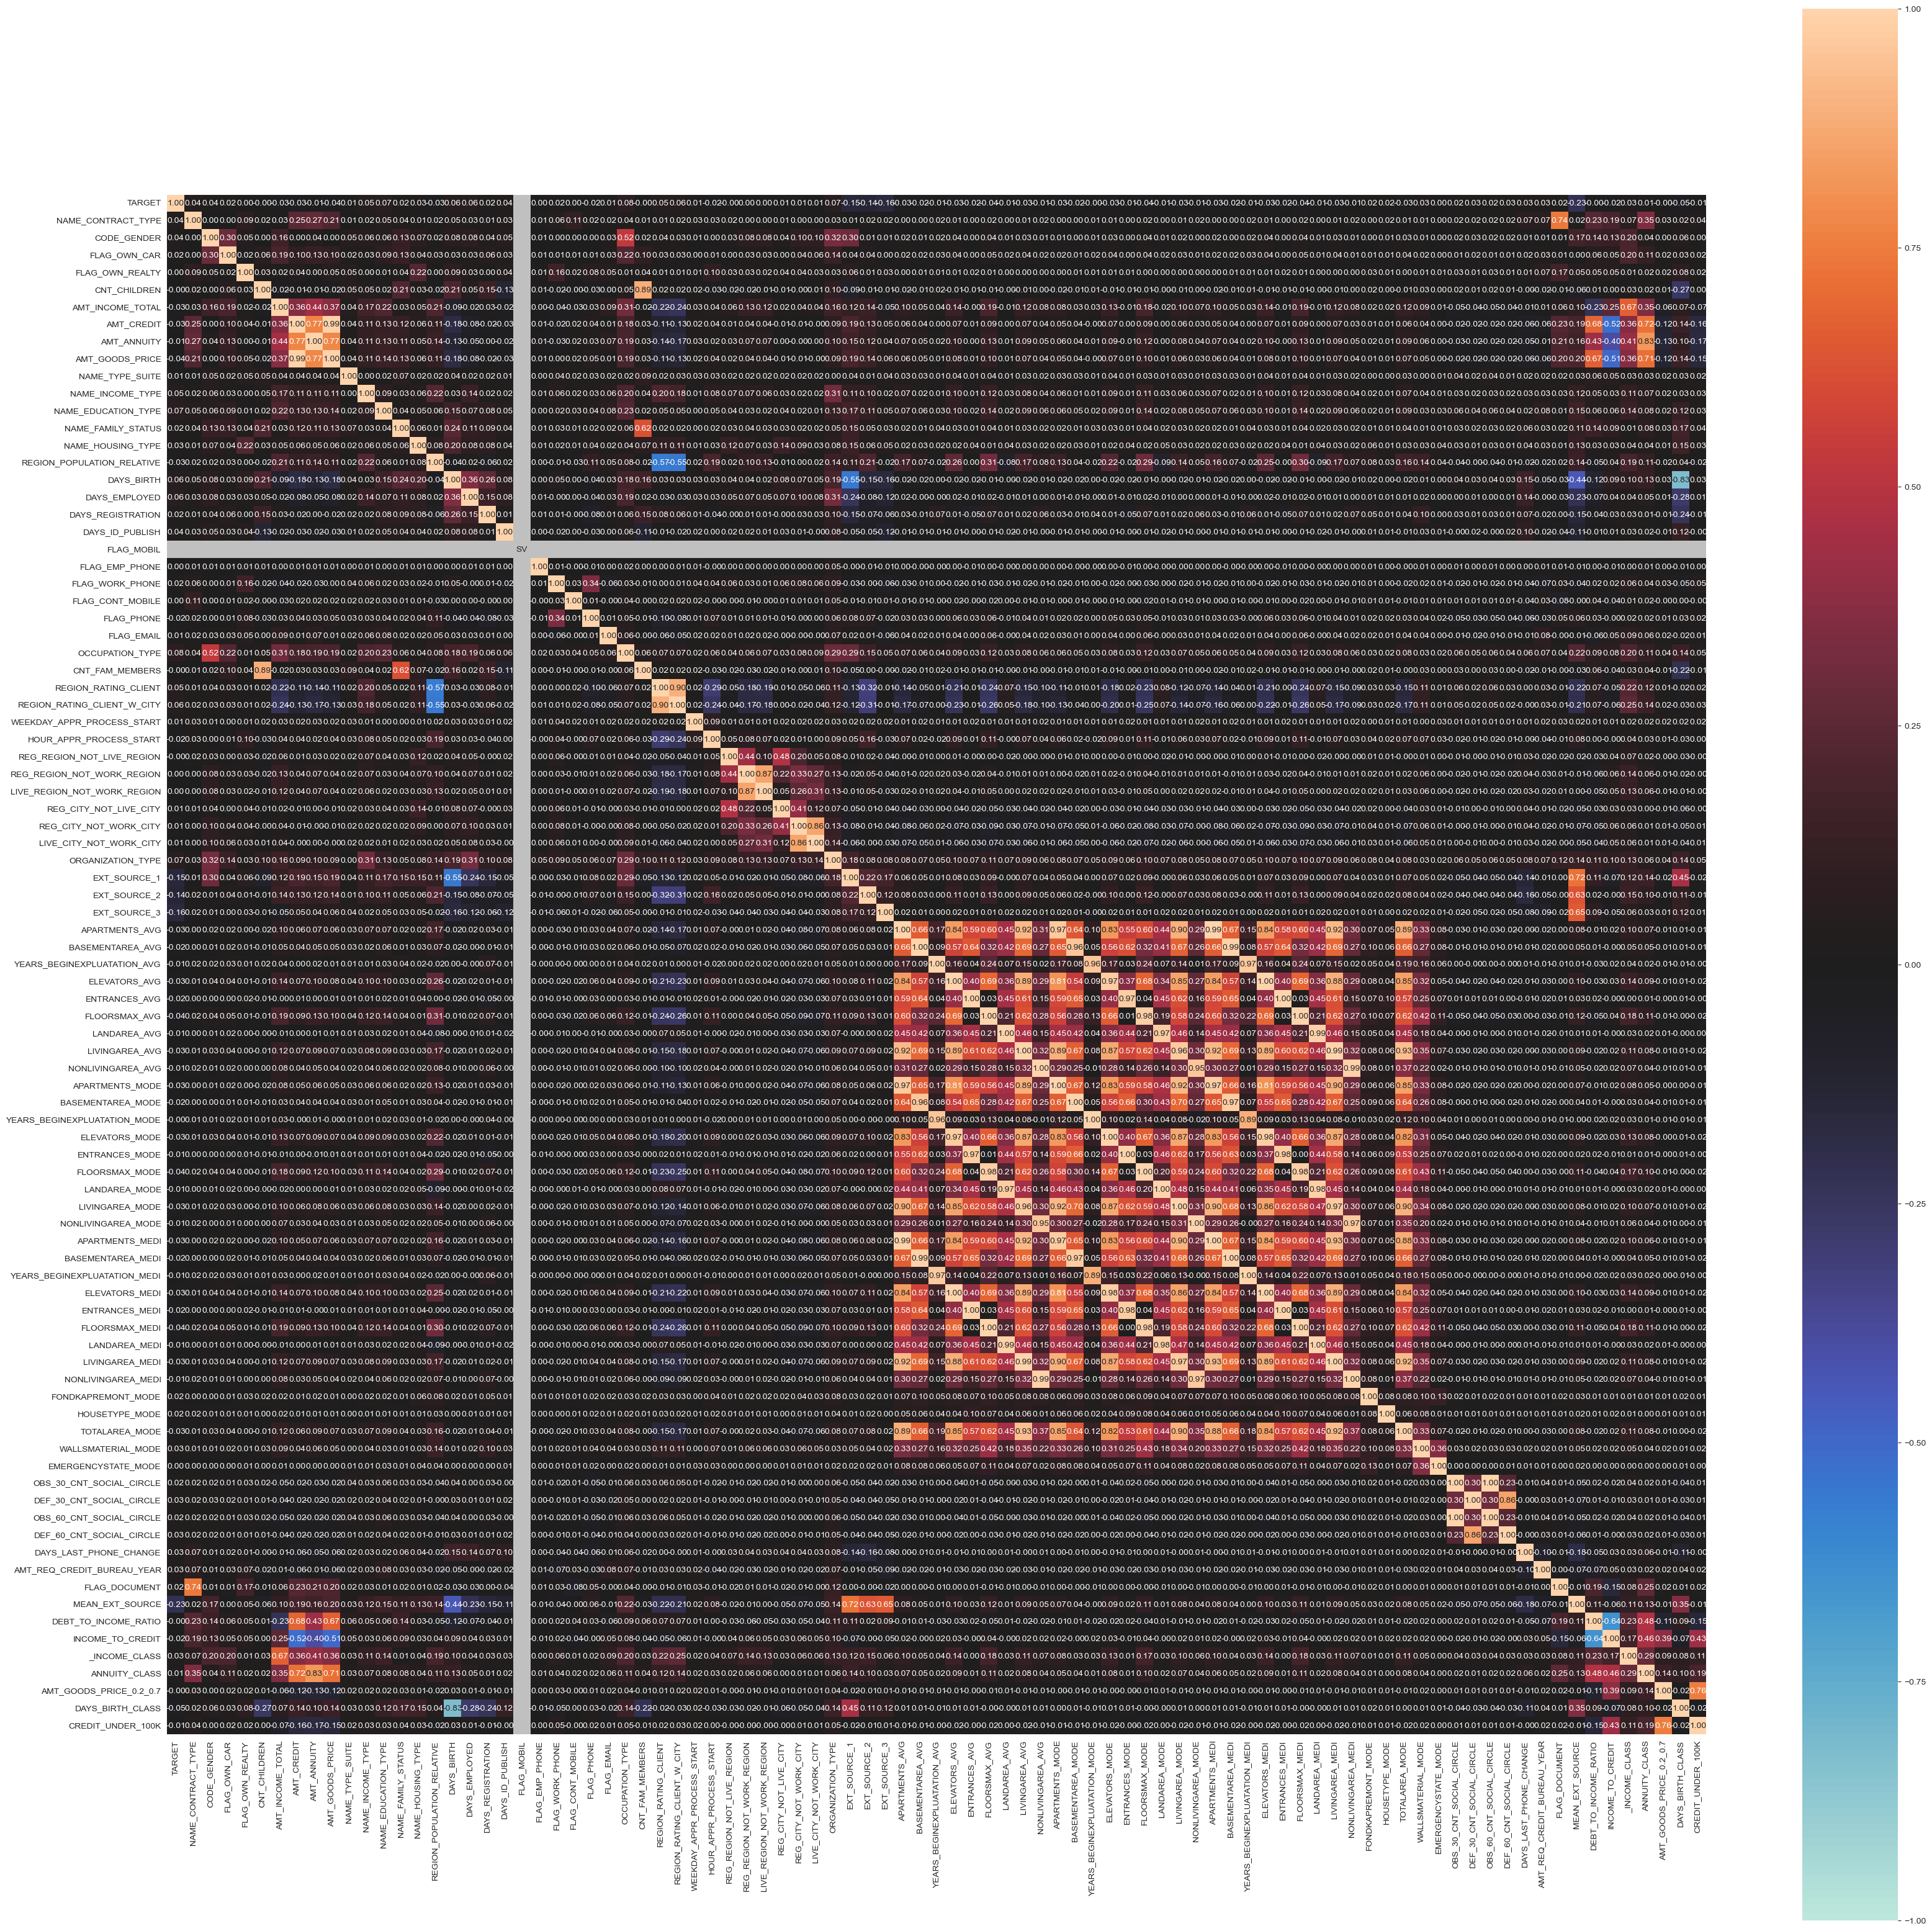

In [250]:
corr_matrix_full = associations(application_train.dropna(), figsize=(40,40))

### <a id='toc1_3_4_'></a>[Saving Datasets](#toc0_)

In [262]:
imputed_features_train.to_csv('df_train_cleaned.csv', index=False)
imputed_features_test.to_csv('df_test_cleaned.csv', index=False)


imputed_features_test.iloc[:3000, :].to_csv('df_test_cleaned_3000.csv', index=False)

### <a id='toc1_3_5_'></a>[Same with smaller Dataset (TARGET corr > 0.04)](#toc0_)

In [251]:
df_corr_full = corr_matrix_full['corr']
drop_columns = df_corr_full.loc[abs(df_corr_full['TARGET']) < 0.04].index.tolist()

In [252]:
app_train_short = application_train.drop(drop_columns, axis=1)
app_test_short = application_test.drop(drop_columns, axis=1)
app_train_short

,TARGET,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,MEAN_EXT_SOURCE,DAYS_BIRTH_CLASS
0,1,Cash loans,Working,Secondary / secondary special,-9461,-637.0,Laborers,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,0.0833,0.0833,0.0833,0.161787,0
1,0,Cash loans,State servant,Higher education,-16765,-1188.0,Core staff,1,1,School,0.311267,0.622246,NaN,0.2917,0.2917,0.2917,0.466757,1
2,0,Revolving loans,Working,Secondary / secondary special,-19046,-225.0,Laborers,2,2,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,0.642739,1
3,0,Cash loans,Working,Secondary / secondary special,-19005,-3039.0,Laborers,2,2,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,0.650442,1
4,0,Cash loans,Working,Secondary / secondary special,-19932,-3038.0,Core staff,2,2,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,0.322738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,Working,Secondary / secondary special,-9327,-236.0,Sales staff,1,1,Services,0.145570,0.681632,NaN,0.6042,0.4583,0.6042,0.413601,0
307507,0,Cash loans,Pensioner,Secondary / secondary special,-20775,NaN,NaN,2,2,XNA,NaN,0.115992,NaN,0.0833,0.0833,0.0833,0.115992,1
307508,0,Cash loans,Working,Higher education,-14966,-7921.0,Managers,3,3,School,0.744026,0.535722,0.218859,0.1667,0.1667,0.1667,0.499536,0
307509,1,Cash loans,Commercial associate,Secondary / secondary special,-11961,-4786.0,Laborers,2,2,Business Entity Type 1,NaN,0.514163,0.661024,0.0417,0.0417,0.0417,0.587593,0


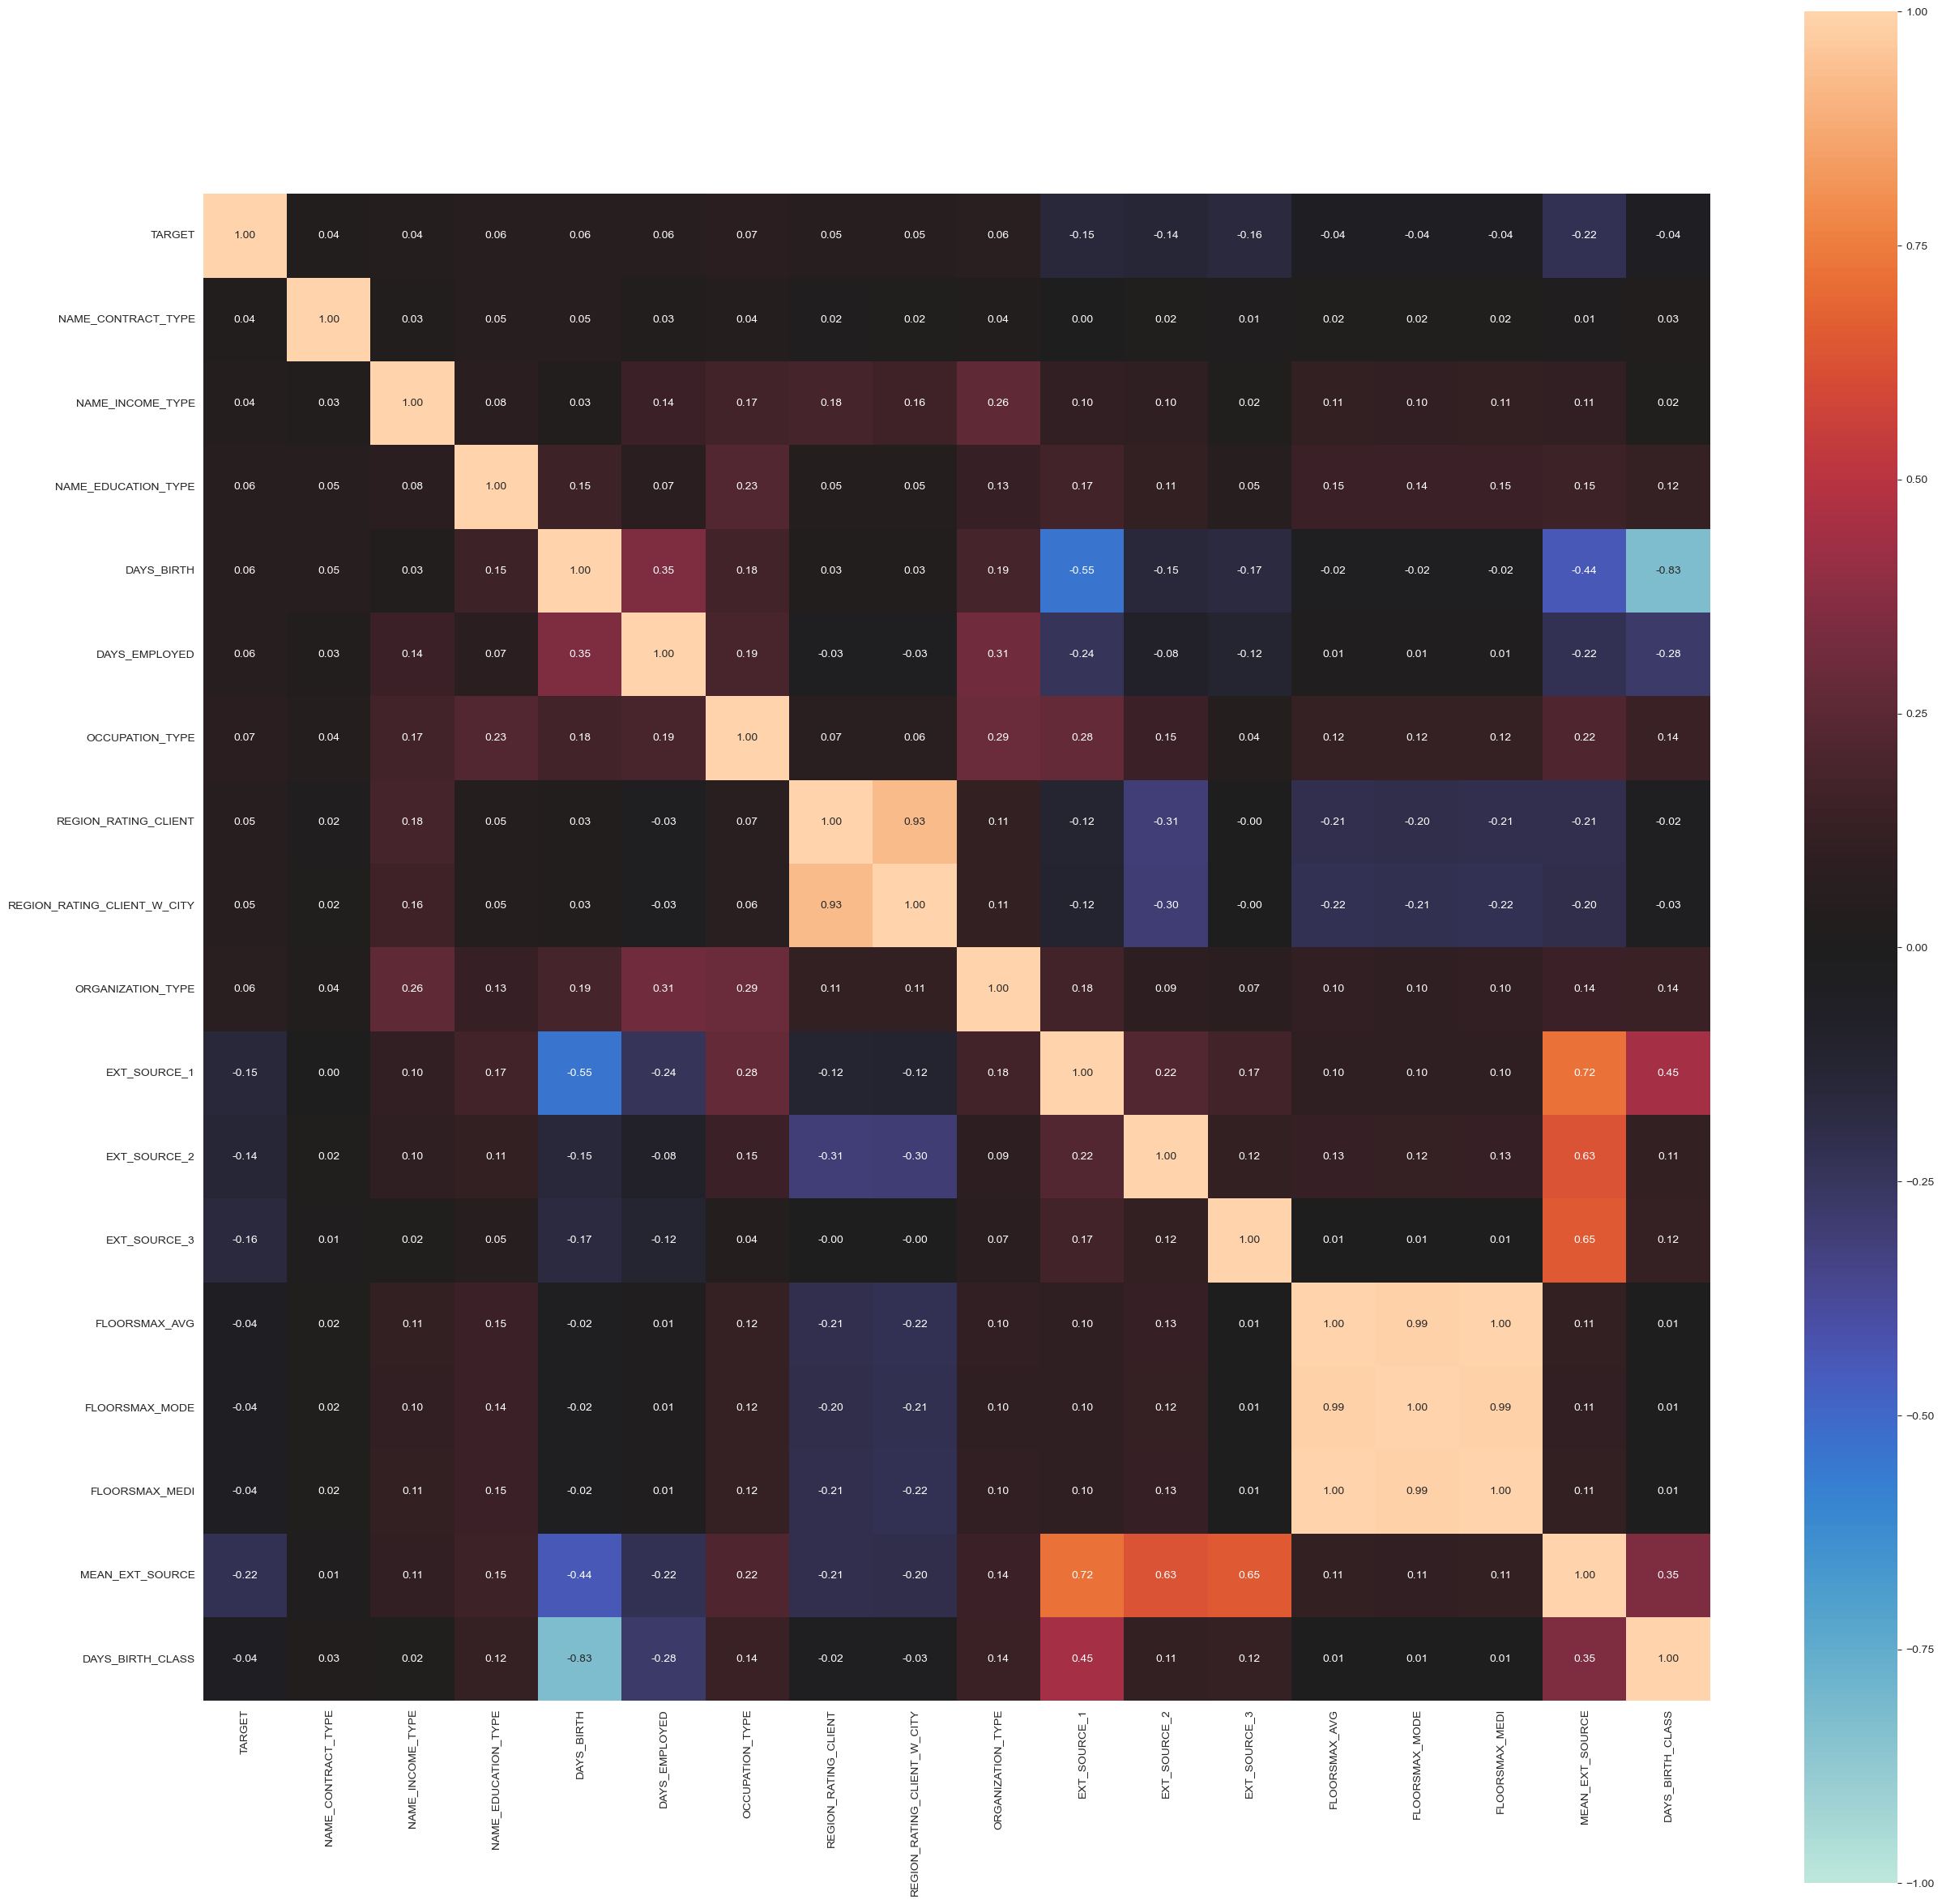

In [253]:
corr_matrix_short = associations(app_train_short.dropna(), figsize=(30,30))

In [254]:
df_corr_short = corr_matrix_short['corr']

# Select upper triangle of the correlation matrix
mask = np.triu(np.ones(df_corr_short.shape), k=1).astype(bool)
upper_triangle = df_corr_short.where(mask)

# Find columns with correlation greater than 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any (upper_triangle[col].gt(0.9))]
to_drop_hicorr

['REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI']

In [255]:
app_train_short.drop(to_drop_hicorr, axis=1, inplace=True)
app_test_short.drop(to_drop_hicorr, axis=1, inplace=True)
app_train_short.shape

(307511, 15)

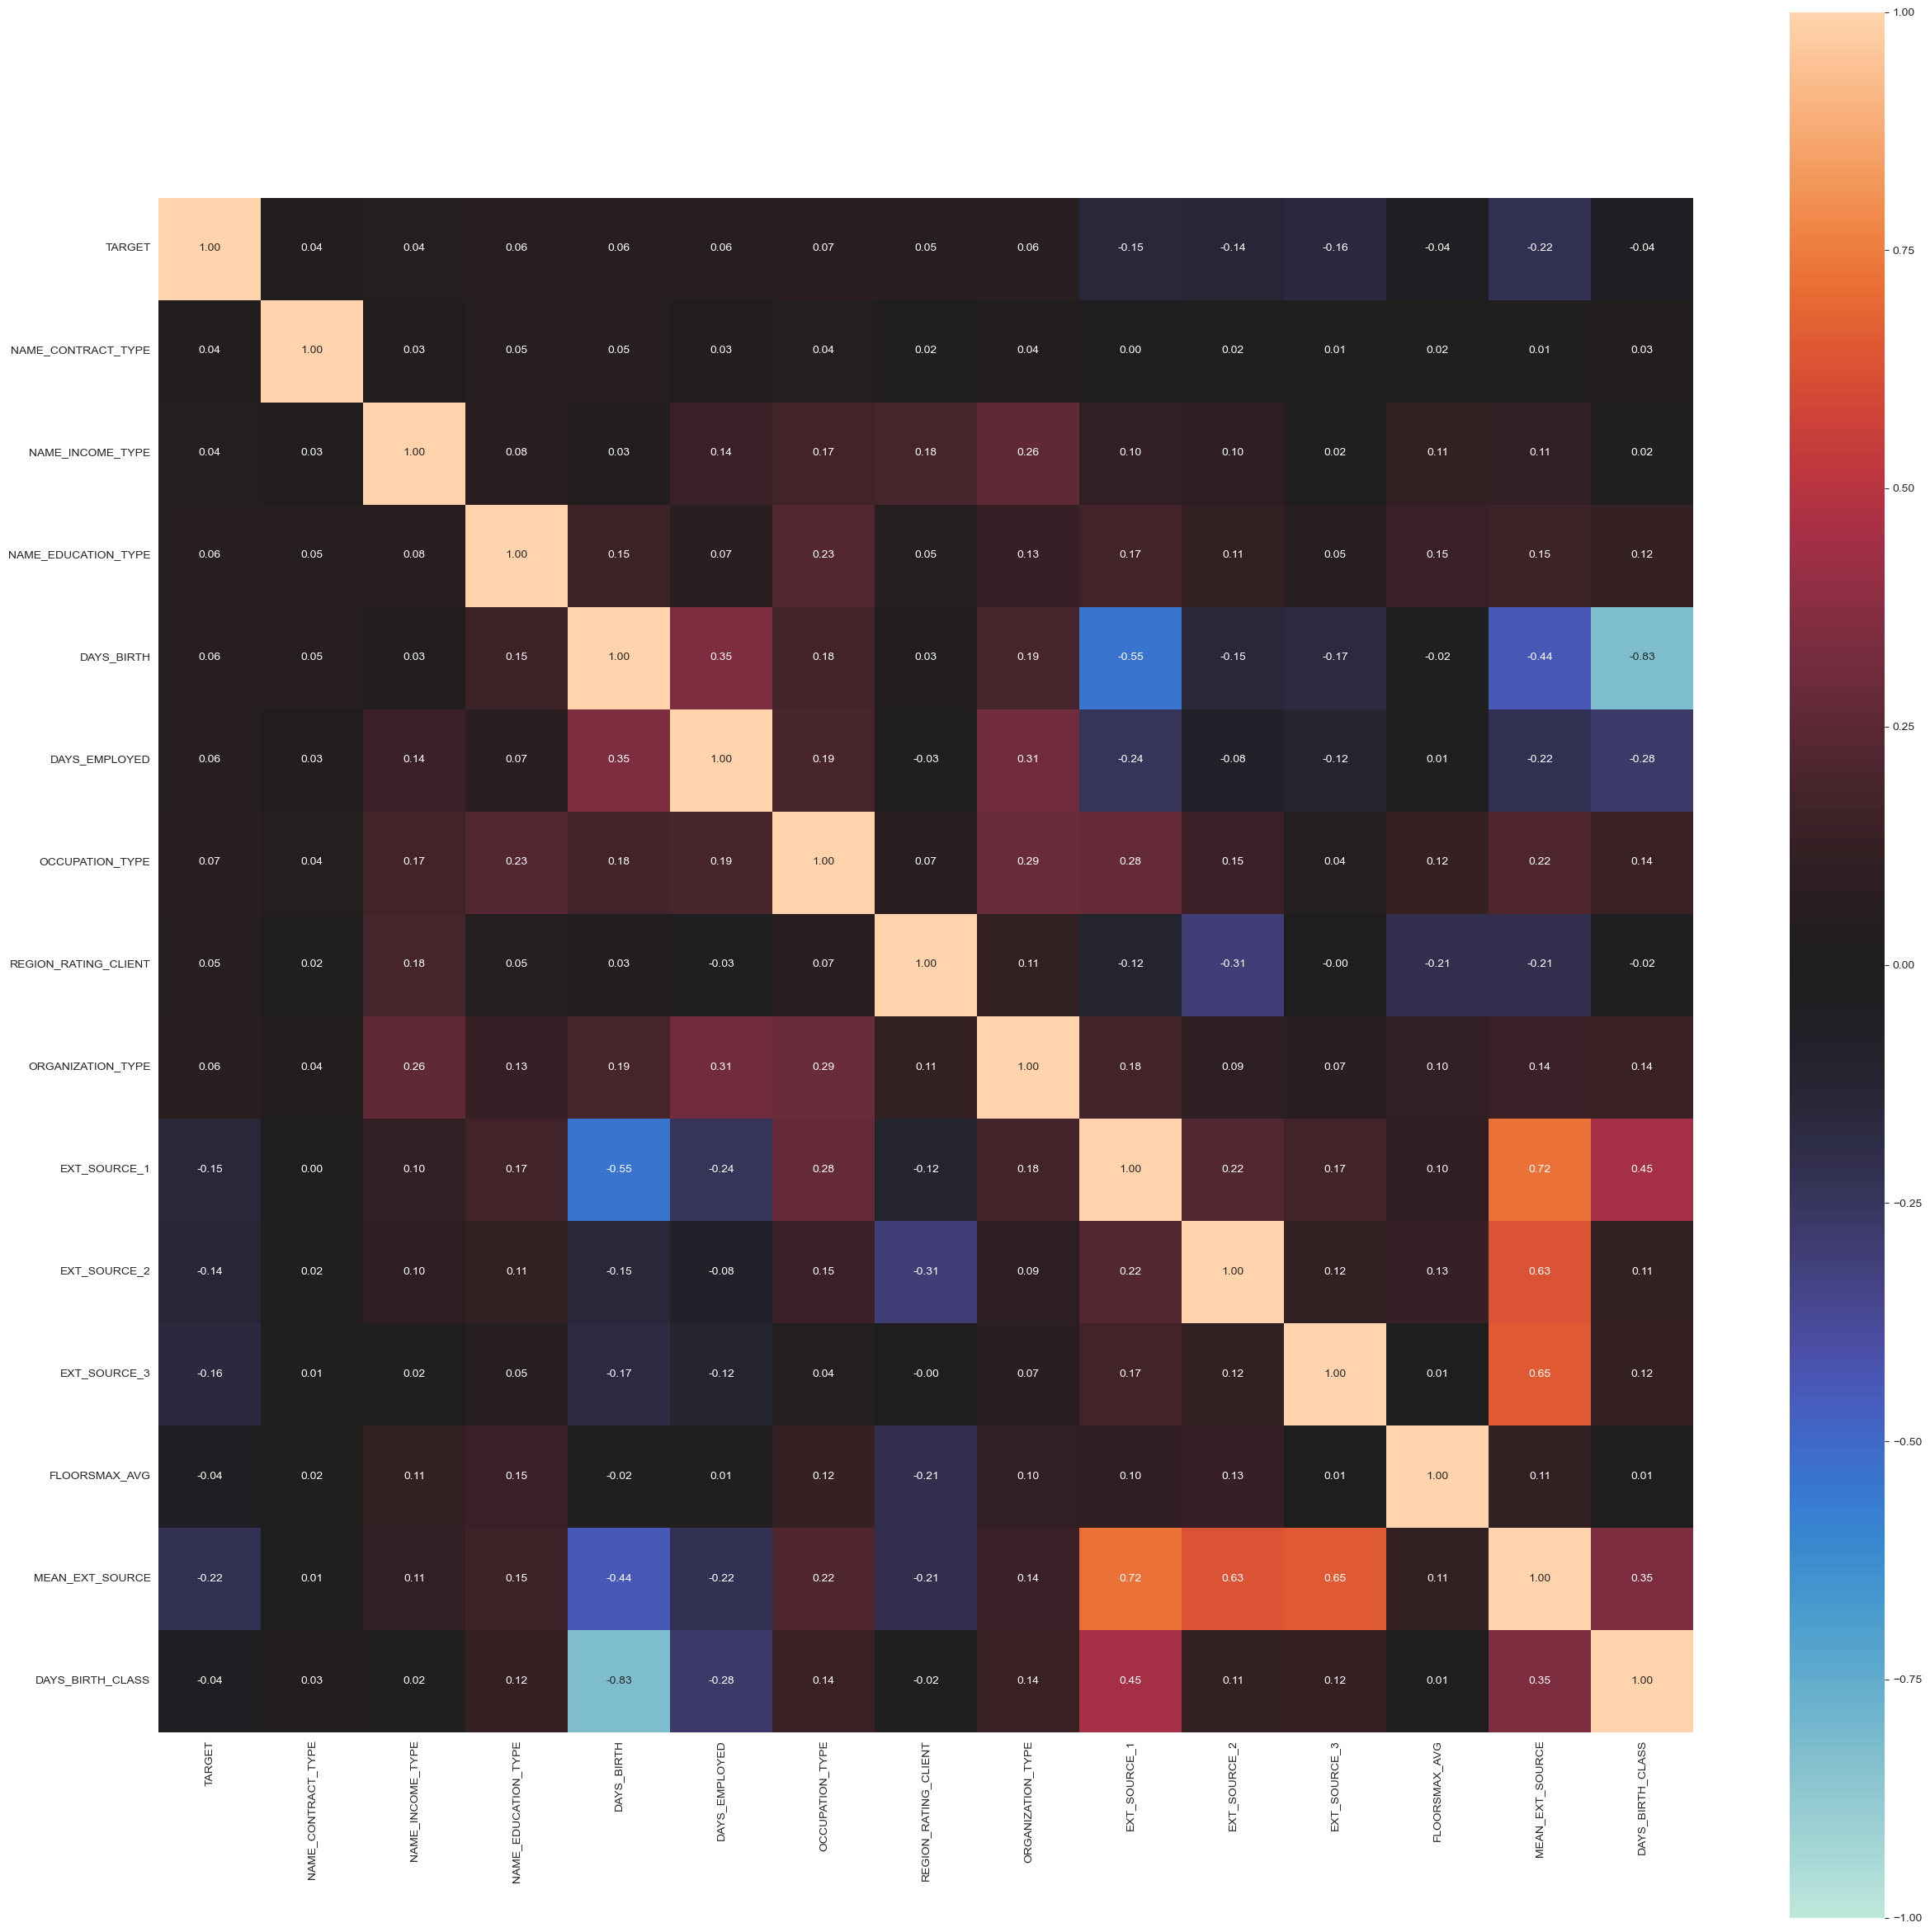

In [256]:
corr_matrix_short = associations(app_train_short.dropna(), figsize=(30,30))

In [257]:
target_short = app_train_short['TARGET']
features_train_short = app_train_short.drop('TARGET', axis=1)

# Impute numerical features using mean imputation
numeric_shortimputer = SimpleImputer(strategy='median')

numeric_features_train_short = features_train_short.select_dtypes(include='number')
imputed_numeric_features_train_short = numeric_shortimputer.fit_transform(numeric_features_train_short)

numeric_features_test_short = app_test_short.select_dtypes(include='number')
imputed_numeric_features_test_short = numeric_shortimputer.transform(numeric_features_test_short)

In [258]:
# Impute categorical features using mode imputation and one-hot encoding
# using dummy_na=False ,we perform onehot encoding without affecting data distribution
categorical_features_train_short = features_train_short.select_dtypes(include='object')
dummy_categorical_features_train_short = pd.get_dummies(categorical_features_train_short, dummy_na=False)

categorical_features_test_short = app_test_short.select_dtypes(include='object')
dummy_categorical_features_test_short = pd.get_dummies(categorical_features_test_short, dummy_na=False)


# Concatenate imputed numerical and categorical features
imputed_features_train_short = pd.concat([target_short,
                                          pd.DataFrame(imputed_numeric_features_train_short,
                                                 columns=numeric_features_train_short.columns),
                                    dummy_categorical_features_train_short],
                                   axis=1)

imputed_features_test_short = pd.concat([pd.DataFrame(imputed_numeric_features_test_short,
                                                columns=numeric_features_test_short.columns),
                                   dummy_categorical_features_test_short],
                                  axis=1)

In [259]:
imputed_features_train_short.drop('NAME_INCOME_TYPE_Maternity leave',
                            axis=1,
                            inplace=True, errors='ignore')
imputed_features_train_short.drop('NAME_FAMILY_STATUS_Unknown',
                            axis=1,
                            inplace=True, errors='ignore')

In [260]:
imputed_features_train_short.shape

(307511, 100)

In [261]:
imputed_features_test_short.shape

(48744, 99)

### <a id='toc1_3_6_'></a>[Saving Datasets short](#toc0_)

In [263]:
imputed_features_train_short.to_csv('df_train_short_cleaned.csv', index=False)
imputed_features_test_short.to_csv('df_test_short_cleaned.csv', index=False)